- Import commonly used libraries and packages.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

- Read in the LANL Earthquake laboratory data.

In [2]:
%%time
df = pd.read_csv("C:/Users/matmi/OneDrive/Documents/LANL_Earthquake_Prediction/train.csv/train.csv")

Wall time: 3min 36s


In [3]:
df.shape

(629145480, 2)

In [4]:
pd.set_option("display.precision", 24)
df.head(10)

,acoustic_data,time_to_failure
0,12,1.469099983200000014704756
1,6,1.469099982099999923690348
2,8,1.469099981000000054720545
3,5,1.469099979899999963706136
4,8,1.469099978800000094736333
5,8,1.469099977700000003721925
6,9,1.469099976599999912707517
7,7,1.469099975500000043737714
8,-5,1.469099974399999952723306
9,3,1.469099973300000083753503


- Time to failure values were rounded to 3 decimal places. The above line of code extends the precision of the values to display 24 decimal places and shows the time to failure is indeed changing at a very low rate.

In [5]:
%%time
df.describe()

Wall time: 4min 55s


,acoustic_data,time_to_failure
count,6.291454800000000000000000e+08,6.291454800000000000000000e+08
mean,4.519467573700124418678570e+00,5.678291712978240646236827e+00
std,1.073570724850370794456467e+01,3.672696519446868812508455e+00
min,-5.515000000000000000000000e+03,9.550396316599999693621598e-05
25%,2.000000000000000000000000e+00,2.625996996050000031885929e+00
50%,5.000000000000000000000000e+00,5.349797741249999738499810e+00
75%,7.000000000000000000000000e+00,8.173395507775000012884448e+00
max,5.444000000000000000000000e+03,1.610739999999999838564690e+01


- The quartiles and min/max show that the data is discrete. They are all integers.

In [6]:
%%time
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629145480 entries, 0 to 629145479
Data columns (total 2 columns):
 #   Column           Dtype  
---  ------           -----  
 0   acoustic_data    int64  
 1   time_to_failure  float64
dtypes: float64(1), int64(1)
memory usage: 9.4 GB
Wall time: 84.8 ms


- At its base form there is 9.4BG of data before feature creation stage.

In [ ]:
%%time
df.isnull().sum()

- There are no null values, as expected.

In [12]:
%%time
df.iloc[1]

Wall time: 0 ns


acoustic_data      6.000000000000000000000000
time_to_failure    1.469099982099999923690348
Name: 1, dtype: float64

Text(0.5, 1.0, 'Even closer look at the time to failure')

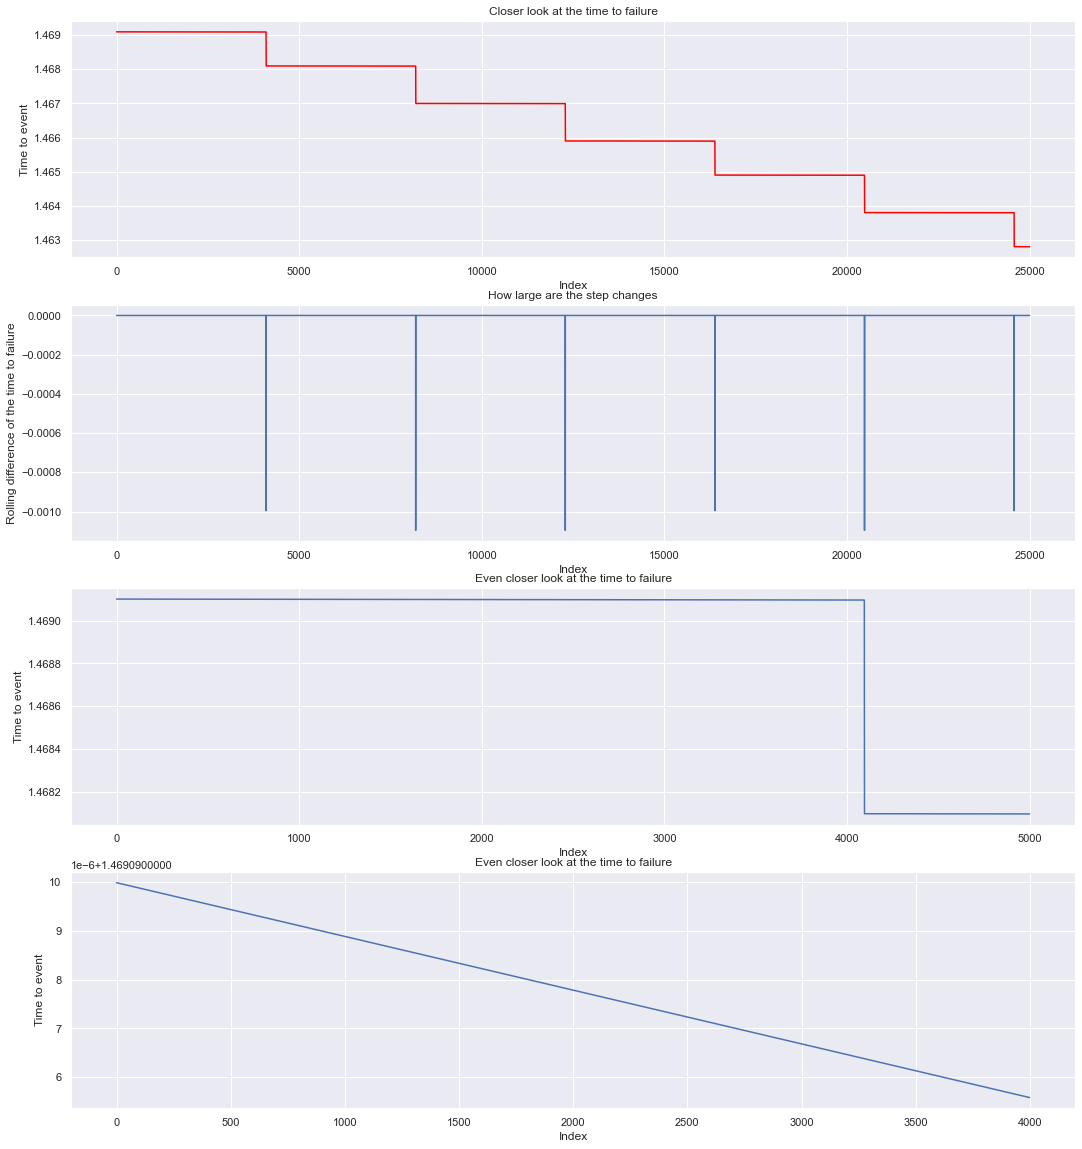

In [7]:
fig, ax = plt.subplots(4,1, figsize=(18,20))

ax[0].plot(df.index.values[0:25000], df.time_to_failure.values[0:25000], c="Red")
ax[0].set_xlabel("Index")
ax[0].set_ylabel("Time to event")
ax[0].set_title("Closer look at the time to failure")

ax[1].plot(df.index.values[0:24999], np.diff(df.time_to_failure.values[0:25000]))
ax[1].set_xlabel("Index")
ax[1].set_ylabel("Rolling difference of the time to failure")
ax[1].set_title("How large are the step changes")

ax[2].plot(df.index.values[0:5000], df.time_to_failure.values[0:5000])
ax[2].set_xlabel("Index")
ax[2].set_ylabel("Time to event")
ax[2].set_title("Even closer look at the time to failure")

ax[3].plot(df.index.values[0:4000], df.time_to_failure.values[0:4000])
ax[3].set_xlabel("Index")
ax[3].set_ylabel("Time to event")
ax[3].set_title("Even closer look at the time to failure")

- There appear to be step changes in the ttf data with a stable trend between the steps. 
- The step changes are not the same size.
- Looking closer at the stable trend between the step changes, the data is actually decreasing at a very small rate.

- Below I am reducing the size of the data to 1% in order to manage the memory load.

In [8]:
# .values[::100] changes the df column to a numpy array, but not sure the use of [::100]
# the [::100] indicates to create an array of values skipping 99 observations to create 1% of the data

train_acoustic_arr = df['acoustic_data'].values[::100]
time_to_failure_arr = df['time_to_failure'].values[::100]

In [9]:
print(len(train_acoustic_arr), len(df)*0.01)

6291455 6291454.8


In [14]:
%%time
df.iloc[621985672:621985674]

Wall time: 0 ns


,acoustic_data,time_to_failure
621985672,10,0.000595512439299999995525
621985673,2,11.618600019000000500568603


* Calculate the rolling difference of the time to failure to identify the step increases in value (delta_ttf>0), which indicate an experimental earthquake. Based on the 

In [15]:
%%time
df_diff = df.time_to_failure.diff()
df_diff.head(10)

Wall time: 2.37 s


0                           NaN
1   -0.000000001100000091014408
2   -0.000000001099999868969803
3   -0.000000001100000091014408
4   -0.000000001099999868969803
5   -0.000000001100000091014408
6   -0.000000001100000091014408
7   -0.000000001099999868969803
8   -0.000000001100000091014408
9   -0.000000001099999868969803
Name: time_to_failure, dtype: float64

In [16]:
len(df_diff)

629145480

In [17]:
quake_ind = df_diff.loc[df_diff > 0]

In [18]:
quake_ind

5656574      11.540004507177050285804398
50085878     14.179904507825289883271580
104677356     8.855904506336079506922943
138772453    12.692904507131899549676746
187641820     8.054904506145900811020510
218652630     7.057904505904599723464798
245829585    16.106904507467007192644814
307838917     7.904904506085149940020074
338276287     9.636904506474079923350473
375377848    11.425904506611239241919975
419368880    11.024004506283079152240134
461811623     8.828004506336833756563465
495800225     8.565904506238307902776796
528777115    14.750904507492730743933862
585568144     9.458904506387009192280857
621985673    11.618004506560700050954438
Name: time_to_failure, dtype: float64

In [19]:
len(quake_ind)

16

- Calculate the rolling difference of the time to failure to identify the step increases in value (delta_ttf>0), which indicate an experimental earthquake. Based on the code above, there are 16 simulated earthquake events present in the data.

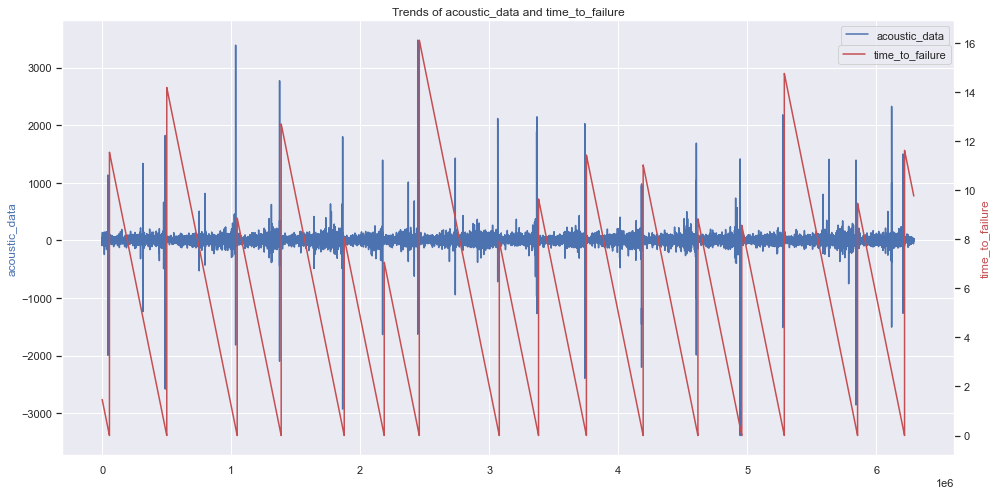

In [20]:
fig, ax1 = plt.subplots(figsize=(16,8))
plt.title("Trends of acoustic_data and time_to_failure")
plt.plot(train_acoustic_arr, color='b')
ax1.set_ylabel('acoustic_data', color='b')
plt.legend(['acoustic_data'])
ax2=ax1.twinx()
plt.plot(time_to_failure_arr, color='r')
ax2.set_ylabel('time_to_failure', color='r')
plt.legend(['time_to_failure'], loc=(0.87,0.9))
plt.grid(False)


In [21]:
df_rdc = pd.DataFrame()
df_rdc.loc[:,'acoustic_data'] = train_acoustic_arr
df_rdc.loc[:,'ttf'] = time_to_failure_arr

In [26]:
df_rdc.head()

,acoustic_data,ttf,sm_avg_ser_14,sm_std_ser_14,sm_avg_ser_56,sm_std_ser_56,sm_avg_ser_224,sm_std_ser_224,sm_avg_ser_896,sm_std_ser_896
895,6,1.446796150800000013703084,7.357142857142856762209249,0.000000460480167023504239,6.535714285714285587403083,0.000536659109525248014839,5.406250000000000000000000,0.001712347482620567773112,5.149553571428571174806166,0.006707648503985468892152
896,4,1.446796040800000016091076,7.000000000000000000000000,0.000000460480170777263782,6.535714285714285587403083,0.000531154829858117489595,5.433035714285714412596917,0.001710801678532983998229,5.140625000000000000000000,0.006707946685558077541678
897,5,1.446795930800000018479068,6.785714285714285587403083,0.000000460480174531023325,6.535714285714285587403083,0.000524846867050565712987,5.410714285714285587403083,0.001708926715769022545988,5.147321428571428825193834,0.006708152787103637687549
898,1,1.446795820800000020867060,6.214285714285714412596917,0.000000460480178284782815,6.464285714285714412596917,0.000517705844616418286303,5.383928571428571174806166,0.001706721509511866310960,5.140625000000000000000000,0.006708266817109214547044
899,5,1.446795710800000023255052,6.071428571428571174806166,0.000000460480182038542305,6.428571428571428825193834,0.000509696749423830196800,5.383928571428571174806166,0.001704184777761899019163,5.150669642857143237790751,0.006708288780270008945517


C:\Users\matmi\anaconda_3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Signal distribution')

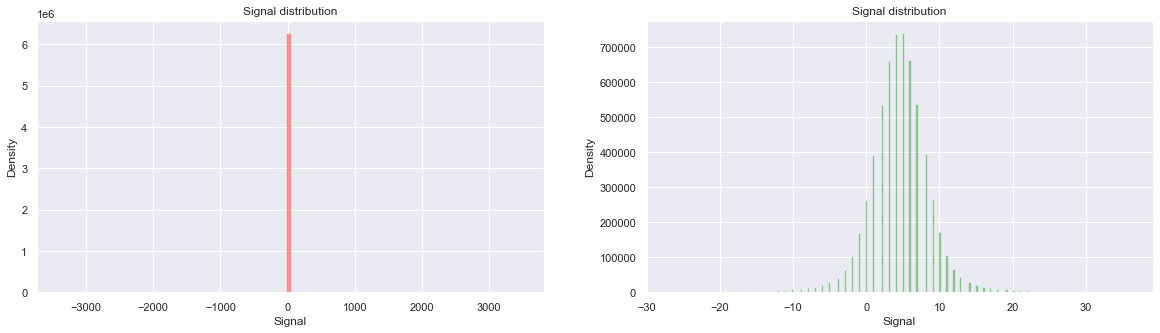

In [27]:
fig, ax = plt.subplots(1, 2, figsize=[20,5])
sns.distplot(df_rdc.acoustic_data.values, ax=ax[0], color="Red", bins=100, kde=False)
ax[0].set_xlabel("Signal")
ax[0].set_ylabel("Density")
ax[0].set_title("Signal distribution")

min_val = df_rdc.acoustic_data.mean() - 3 * df_rdc.acoustic_data.std()
max_val = df_rdc.acoustic_data.mean() + 3 * df_rdc.acoustic_data.std()
sns.distplot(df_rdc.loc[(df_rdc.acoustic_data >= min_val) & (df_rdc.acoustic_data <= max_val), "acoustic_data"].values, 
             ax=ax[1], 
             color="Green", 
             bins=200, 
             kde=False)
ax[1].set_xlabel("Signal")
ax[1].set_ylabel("Density")
ax[1].set_title("Signal distribution")

- The signal distribution with spikes in the data vs. the signal distribution w/out spikes.
- When reducing the data to within 3 std of the mean, the data displays a normal distribution.

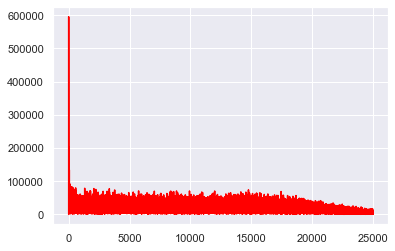

In [28]:
import scipy.signal as sg

ad = df_rdc['acoustic_data'].values
ad = ad - np.mean(ad)  # remove DC component, otherwise it dominates the plot

b, a = sg.butter(6, Wn=20000 / round(len(df_rdc)/2))
ad = sg.lfilter(b, a, ad)

zc = np.fft.fft(ad)
#zc = zc[:round(len(df_rdc)/2)]  # eliminate aliased portion of signal per Nyquist criteria
zc = zc[:25000]

realFFT = np.real(zc)
imagFFT = np.imag(zc)
magFFT = np.sqrt(realFFT ** 2 + imagFFT ** 2)

plt.plot(magFFT, color="Red")

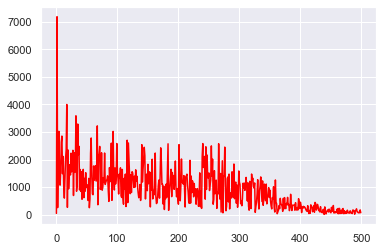

In [69]:
ad = df_rdc.iloc[2450000:2550000]['acoustic_data'].values
ad = ad - np.mean(ad)  # remove DC component, otherwise it dominates the plot

b, a = sg.butter(6, Wn=20000 / round(len(df_rdc)/2))
ad = sg.lfilter(b, a, ad)

zc = np.fft.fft(ad)
#zc = zc[:round(len(df_rdc)/2)]  # eliminate aliased portion of signal per Nyquist criteria
zc = zc[:500]

realFFT = np.real(zc)
imagFFT = np.imag(zc)
magFFT = np.sqrt(realFFT ** 2 + imagFFT ** 2)

plt.plot(magFFT, color="Red")

- The data is not showing any dominant frequency in the signal. It appears mostly made up of noise as expected.
- A rolling FFT (aka "waterfall FFT") may be interesting to determine if a dominant frequency is present near or around the experimental earthquake events.

In [46]:
window_sizes = [14, 56, 224, 896]
for wind in window_sizes:
    df_rdc['sm_avg_ser_' + str(wind)] = df_rdc['acoustic_data'].rolling(window=wind).mean()
    df_rdc['sm_std_ser_' + str(wind)] = df_rdc['acoustic_data'].rolling(window=wind).std()

In [47]:
df_rdc = df_rdc.dropna()

- Have to drop null values created by the rolling functions above.

In [48]:
df_rdc.head()

,acoustic_data,ttf,sm_avg_ser_14,sm_std_ser_14,sm_avg_ser_56,sm_std_ser_56,sm_avg_ser_224,sm_std_ser_224,sm_avg_ser_896,sm_std_ser_896
2685,3,1.399997497199999996198017,3.785714285714285587403083,1.928673175989034760391405,4.250000000000000000000000,3.904542808761920280602453,4.937500000000000000000000,5.863593305934434063431127,4.848214285714285587403083,7.373920308646964016929815
2686,9,1.399997387199999998586009,4.214285714285714412596917,2.359223191207959313686615,4.357142857142856762209249,3.951655908044663600975355,4.955357142857143237790751,5.869871990196553035445959,4.854910714285714412596917,7.374964322826848217573570
2687,7,1.399997277200000000974001,4.428571428571428825193834,2.471819190371639329839581,4.500000000000000000000000,3.898717737923568904534477,4.950892857142856762209249,5.867925975422911832879436,4.859375000000000000000000,7.375050894626016706467908
2688,5,1.399997167200000003361993,4.571428571428571174806166,2.440500759279404352497522,4.446428571428571174806166,3.870257885967804067917086,4.968750000000000000000000,5.861932084035735179838866,4.862723214285714412596917,7.374432272844313018822504
2689,4,1.399997057200000005749985,4.428571428571428825193834,2.408775166385853871986455,4.482142857142856762209249,3.856475411227520133650160,4.959821428571428825193834,5.861877441814793421315244,4.856026785714285587403083,7.372486027755448034781693


In [49]:
sm_avg_arr_14 = df_rdc['sm_avg_ser_14'].values
sm_std_arr_14 = df_rdc['sm_std_ser_14'].values

sm_avg_arr_56 = df_rdc['sm_avg_ser_56'].values
sm_std_arr_56 = df_rdc['sm_std_ser_56'].values

sm_avg_arr_224 = df_rdc['sm_avg_ser_224'].values
sm_std_arr_224 = df_rdc['sm_std_ser_224'].values

sm_avg_arr_896 = df_rdc['sm_avg_ser_896'].values
sm_std_arr_896 = df_rdc['sm_std_ser_896'].values

- Creating simple moving averages and standard deviations with different window sizes to determine possible best window size.

Text(0, 0.5, 'Simple moving std of window size 896')

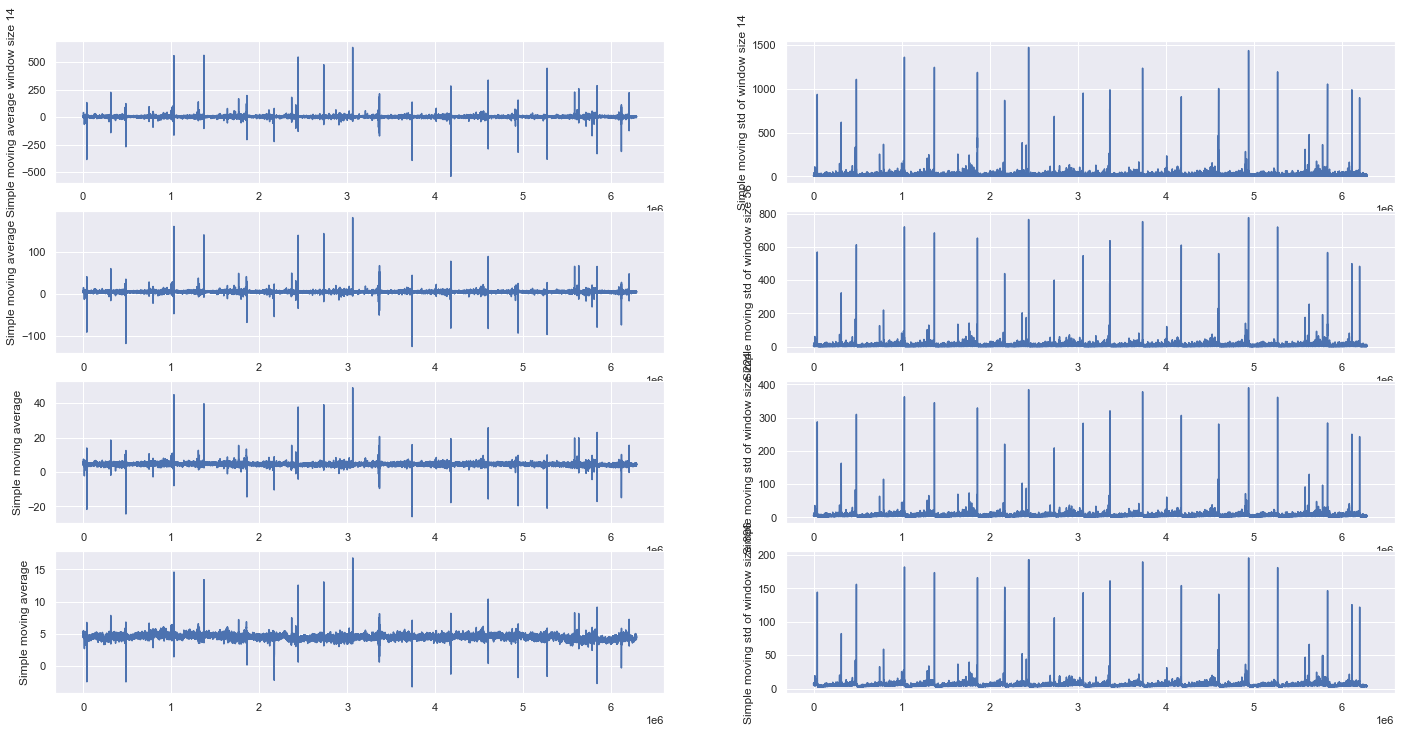

In [50]:
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(24,12))

axs[0,0].plot(df_rdc.sm_avg_ser_14, color='b')
axs[0,0].set_ylabel("Simple moving average window size 14")

axs[0,1].plot(sm_std_arr_14,color='b')
axs[0,1].set_ylabel("Simple moving std of window size 14")

axs[1,0].plot(sm_avg_arr_56, color='b')
axs[1,0].set_ylabel("Simple moving average")

axs[1,1].plot(sm_std_arr_56,color='b')
axs[1,1].set_ylabel("Simple moving std of window size 56")

axs[2,0].plot(sm_avg_arr_224, color='b')
axs[2,0].set_ylabel("Simple moving average")

axs[2,1].plot(sm_std_arr_224,color='b')
axs[2,1].set_ylabel("Simple moving std of window size 224")

axs[3,0].plot(sm_avg_arr_896, color='b')
axs[3,0].set_ylabel("Simple moving average")

axs[3,1].plot(sm_std_arr_896,color='b')
axs[3,1].set_ylabel("Simple moving std of window size 896")

#ax2 = ax1.twinx()
#plt.plot(sm_std_arr, color='lightgreen')
#ax2.set_ylabel("simple moving standard deviation")
#plt.grid(False)



#plt.plot(df_5pct['sm_avg_ser_56'])
#plt.plot(df_5pct['sm_avg_ser_224'])
#plt.plot(df_5pct['sm_avg_ser_896'])

In [51]:
df_rdc.columns

Index(['acoustic_data', 'ttf', 'sm_avg_ser_14', 'sm_std_ser_14',
       'sm_avg_ser_56', 'sm_std_ser_56', 'sm_avg_ser_224', 'sm_std_ser_224',
       'sm_avg_ser_896', 'sm_std_ser_896'],
      dtype='object')

In [59]:
diff_ser = df_rdc.ttf.diff()
event_ser = diff_ser.loc[diff_ser > 0]
event_ser

56566      11.540004397876849395743193
500859     14.179904398124961062421789
1046774     8.855904397436040298430271
1387725    12.692904397931998872195436
1876419     8.054904397245710612196490
2186527     7.057904397005000163289878
2458296    16.106904399066891642178234
3078390     7.904904397185060105357479
3382763     9.636904397573898606310649
3753779    11.425904397911009979793562
4193689    11.024004397382679343309064
4618117     8.828004397436544081756438
4958003     8.565904397337950726409872
5287772    14.750904399092709340379770
5855682     9.458904397486909587655646
6219857    11.618004398360529449973910
Name: ttf, dtype: float64

- Use 2458296 index to create the plots around the earthquake event.

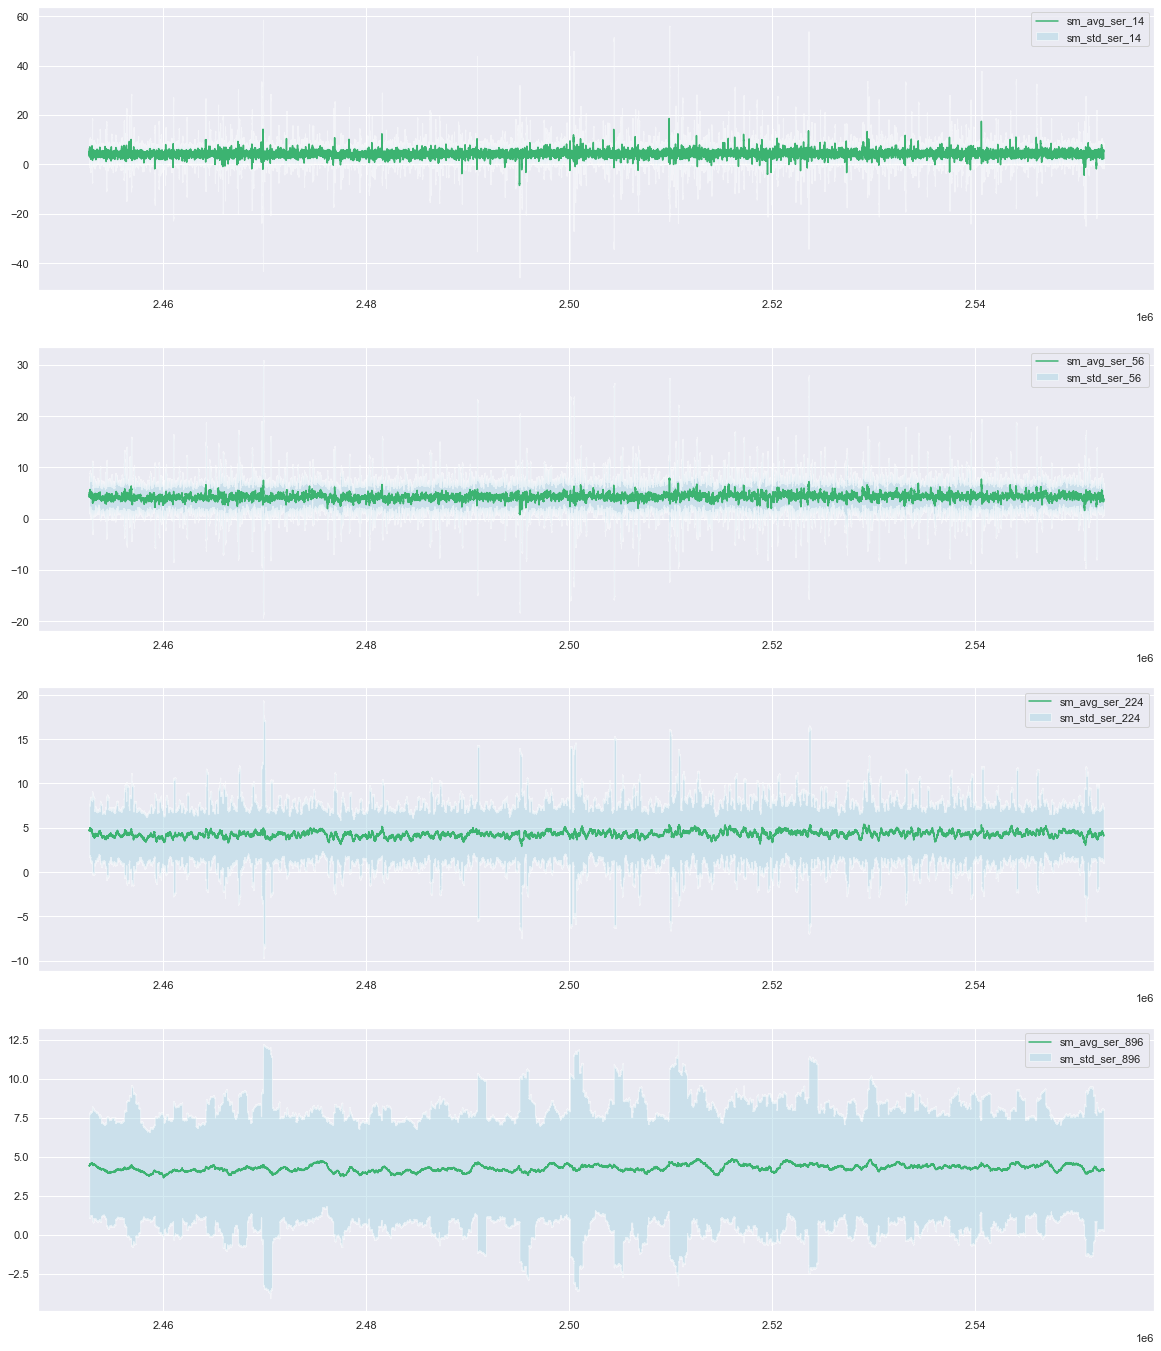

In [64]:
fig, ax = plt.subplots(len(window_sizes),1,figsize=(20,6*len(window_sizes)))

n=0
for col in df_rdc:
    for win in window_sizes:
        if 'sm_avg_ser_' + str(win) in col:
            avg_ser = df_rdc.iloc[2450000:2550000][col]
            ax[n].plot(avg_ser, label=col, color='mediumseagreen')
        if 'sm_std_ser_' + str(win) in col:
            std_ser = df_rdc.iloc[2450000:2550000][col]
            ax[n].fill_between(avg_ser.index.values, avg_ser.values - std_ser, avg_ser.values + std_ser,
                              facecolor='lightblue', alpha=0.5, label=col)
            ax[n].legend()
            n=n+1


#mean_df = df_rdc.iloc[4435000:4445000]['sm_avg_ser_14']
#std_df = df_rdc.iloc[4435000:4445000]["sm_std_ser_14"].values

#ax[0].plot(mean_df, label="sm_avg_ser_14", color="mediumseagreen")
#ax[0].fill_between(mean_df.index.values, mean_df.values - std_df, mean_df.values + std_df, 
 #                  facecolor='lightgreen', alpha=0.5, label="sm_avg_ser_14")
#ax[0].legend()

#mean_df = df_rdc.iloc[4435000:4445000]['sm_avg_ser_56']
#std_df = df_rdc.iloc[4435000:4445000]["sm_std_ser_56"].values

#ax[1].plot(mean_df, label="sm_avg_ser_56", color="mediumseagreen")
#ax[1].fill_between(mean_df.index.values, mean_df.values - std_df, mean_df.values + std_df, 
  #                 facecolor='lightgreen', alpha=0.5, label="sm_avg_ser_56")
#ax[1].legend()

In [65]:
df_rdc['rolling_q25'] = df_rdc['acoustic_data'].rolling(window=56).quantile(0.25)
df_rdc['rolling_q50'] = df_rdc['acoustic_data'].rolling(window=56).quantile(0.50)
df_rdc['rolling_q75'] = df_rdc['acoustic_data'].rolling(window=56).quantile(0.75)
df_rdc['rolling_iqr'] = df_rdc.rolling_q75 - df_rdc.rolling_q25
df_rdc['rolling_min'] = df_rdc['acoustic_data'].rolling(window=56).min()
df_rdc['rolling_max'] = df_rdc['acoustic_data'].rolling(window=56).max()
df_rdc['rolling_kurtosis'] = df_rdc['acoustic_data'].rolling(window=56).kurt()
df_rdc['rolling_skew'] = df_rdc['acoustic_data'].rolling(window=56).skew()

- Plot the new features.

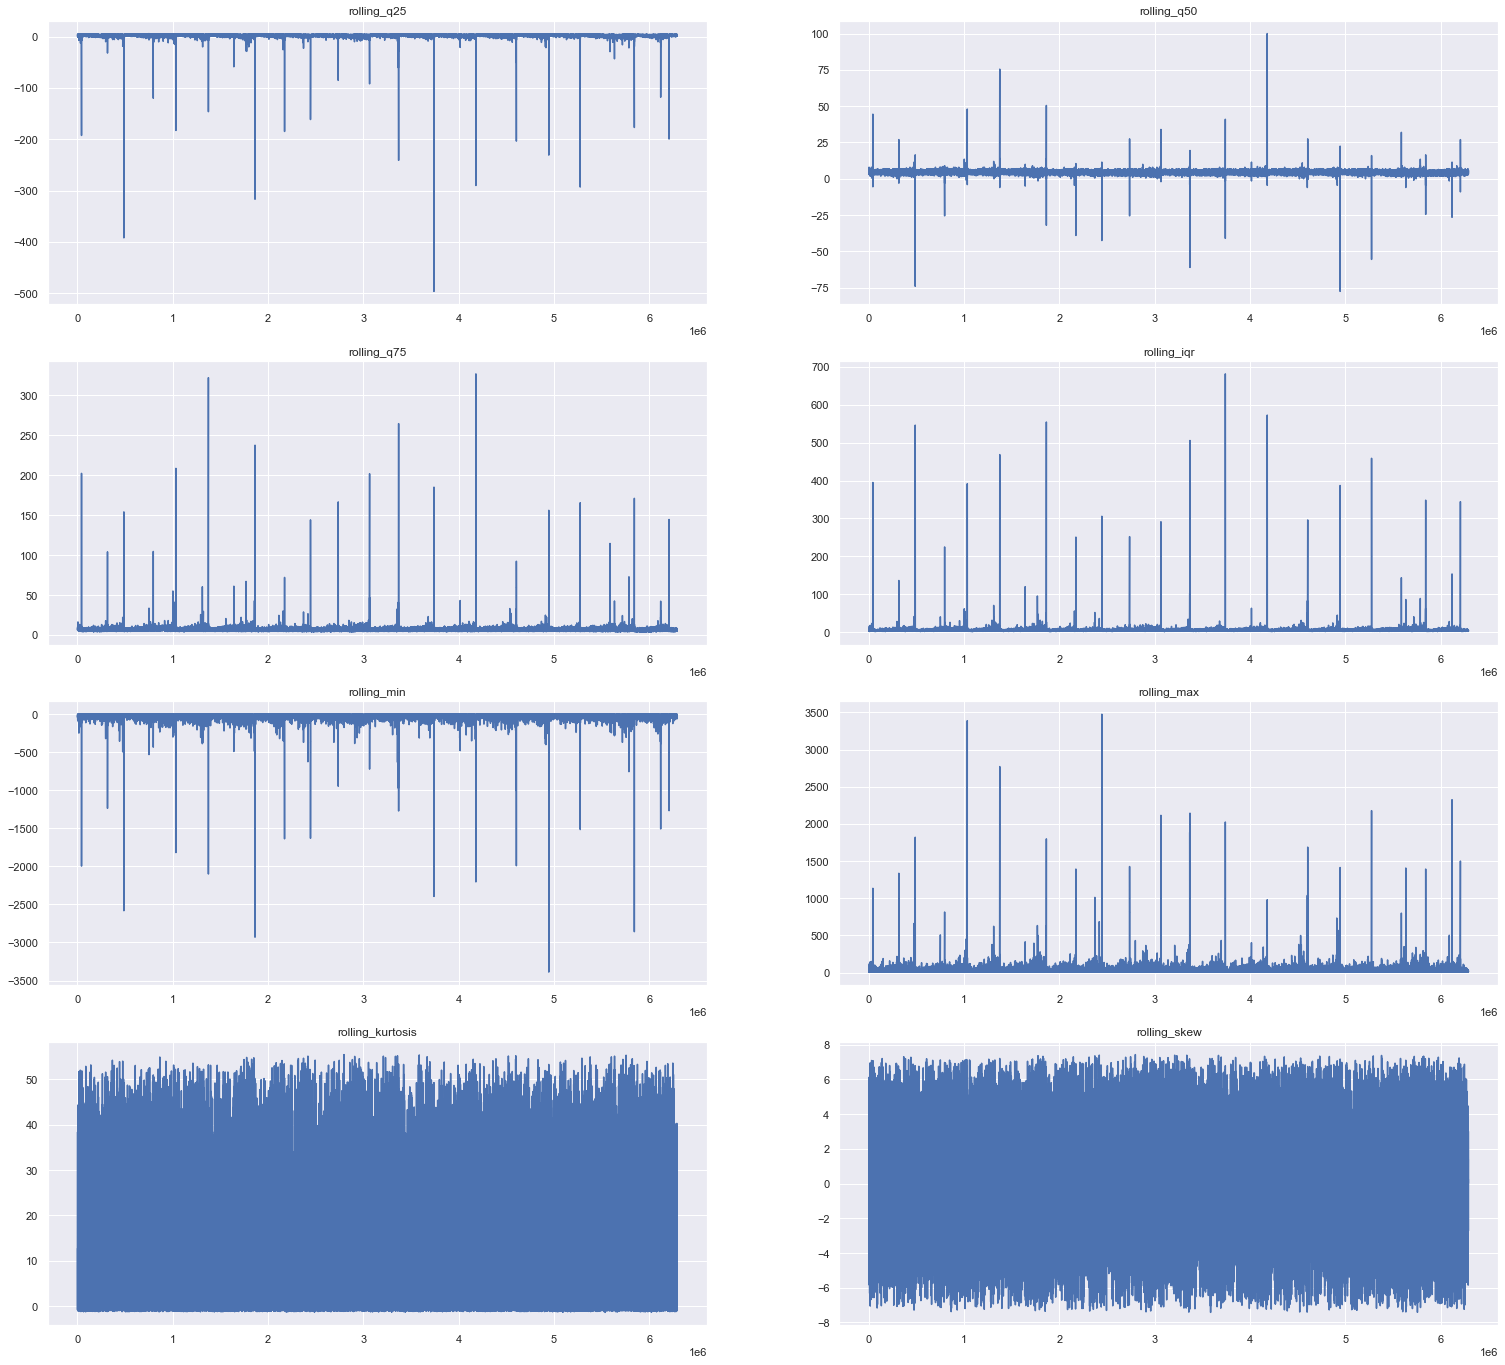

In [66]:
plt.figure(figsize=(26,24))

c = 0
for i, col in enumerate(df_rdc.columns):
    if "rolling_" in col:
        plt.subplot(4, 2, c+1)
        plt.plot(df_rdc[col], color="b")
        plt.title(col)
        c = c+1

# Modeling

In [ ]:
test = pd.read_csv("C:/Users/matmi/OneDrive/Documents/LANL_Earthquake_Prediction/test/seg_00a37e.csv")

In [ ]:
test.head()

- Test data .csv files are useless as we do not have the time to failure data to accompany the acoustic signals.

In [ ]:
from sklearn.model_selection import train_test_split

# Define the X and y for the model

#X = new_df.drop('ttf', axis=1)
#y = new_df.ttf
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=123)

In [ ]:
#scale data
from sklearn import preprocessing
import numpy as np

# build scaler based on training data and apply it to test data to then also scale the test data

#scaler = preprocessing.StandardScaler().fit(X_train)
#X_train_scaled = scaler.transform(X_train)
#X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

#rf = RandomForestRegressor(n_estimators=300, random_state = 321)
#rf.fit(X_train, y_train)